In [73]:
import numpy as np 
import math
import tensorflow as tf
from numpy.ma.core import ceil
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation, colors
from sklearn import preprocessing as sk_preprocessing
from sklearn.preprocessing import StandardScaler #normalization
from sklearn.preprocessing import MinMaxScaler #normalization
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
import os

In [74]:
df = pd.read_csv('Kidney_data.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [75]:
counts = df['classification'].value_counts()
print(counts)

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64


In [76]:
print(df.isnull().any(axis=1)) #checking to verify if there is missing values

print(df.loc[:, df.isnull().any()]) #checking for Null
# df = df.dropna(axis=1) #removing missing value. 
#When I remove all of the columns with missing values, only 1 attribute will be left. Therefore I am replacing missing values with 0 instead of deleting it completely. 

# df = df.replace(np.nan, 0) #replacing the missing values with 0
df = df.dropna(axis =0, how = 'any') #removing rows with missing values

0       True
1       True
2       True
3      False
4       True
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool
      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  

In [77]:
print(df.isnull().any(axis=1)) #checking again to verify if there is still missing values

counts = df['classification'].value_counts()
print(counts)

3      False
9      False
11     False
14     False
20     False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 158, dtype: bool
notckd    115
ckd        43
Name: classification, dtype: int64


In [78]:
#removing all of the columns without numerical values since I do not think it will affect the data
df.drop(columns=['ba', 'rbc', 'pc', 'pcc', 'htn','dm', 'cad','appet', 'pe','ane'], inplace=True)

In [79]:
df.head() # now we only have the columns with numerical values

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,ckd
9,9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,ckd
11,11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,ckd
14,14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6,ckd
20,20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2,ckd


In [80]:
X = df.drop('classification', axis = 1)
Y = df['classification']

standard_scaler = StandardScaler()
standard_scaler.fit(X)
X_normalized = standard_scaler.transform(X)
print(X_normalized)

Y_numerized = Y.replace(({'ckd': 1, 'notckd' : 2, 'ckd\t': 3}))
print(Y_numerized)

[[-2.6476705  -0.10109832 -0.36361289 ... -1.09270478 -0.569768
  -0.97602547]
 [-2.58923201  0.22225259  1.43172574 ... -1.42323578  1.1626841
  -1.17285001]
 [-2.56975252  0.8689544  -0.36361289 ... -1.09270478 -1.27558182
  -1.07443774]
 ...
 [ 1.18979042 -2.42922485  0.53405643 ...  0.78030418 -0.60185045
   0.50015855]
 [ 1.19953017 -2.10587394 -1.2612822  ...  1.00065818 -0.40935577
   0.99221989]
 [ 1.20926992  0.54560349  0.53405643 ...  1.22101217 -0.53768556
   1.18904443]]
3      1
9      1
11     1
14     1
20     1
      ..
395    2
396    2
397    2
398    2
399    2
Name: classification, Length: 158, dtype: int64


C:\Users\1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


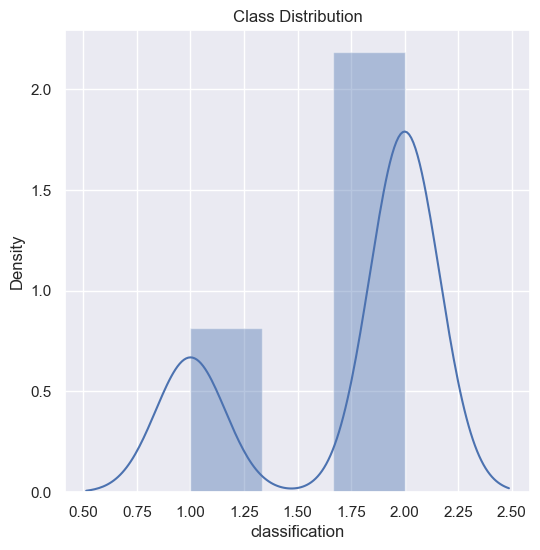

In [81]:
import seaborn as sns

sns.set()
plt.figure(figsize=(6,6))
sns.distplot(Y_numerized)
plt.title('Class Distribution')
plt.show()

#Note: The third class is extremely small which makes it difficult to be among the other classes on the bar chart

In [82]:
# train and test split
train_x, test_x, train_y, test_y = train_test_split(X_normalized, Y_numerized, test_size=0.3, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(110, 15) (110,) (48, 15) (48,)


In [90]:
print(X_normalized)
print(Y_numerized)

[[-2.6476705  -0.10109832 -0.36361289 ... -1.09270478 -0.569768
  -0.97602547]
 [-2.58923201  0.22225259  1.43172574 ... -1.42323578  1.1626841
  -1.17285001]
 [-2.56975252  0.8689544  -0.36361289 ... -1.09270478 -1.27558182
  -1.07443774]
 ...
 [ 1.18979042 -2.42922485  0.53405643 ...  0.78030418 -0.60185045
   0.50015855]
 [ 1.19953017 -2.10587394 -1.2612822  ...  1.00065818 -0.40935577
   0.99221989]
 [ 1.20926992  0.54560349  0.53405643 ...  1.22101217 -0.53768556
   1.18904443]]
3      1
9      1
11     1
14     1
20     1
      ..
395    2
396    2
397    2
398    2
399    2
Name: classification, Length: 158, dtype: int64


In [83]:
from keras.models import Sequential
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
# Train the model
model.fit(train_x, train_y, epochs=10, batch_size=32)

Epoch 1/10
4/4 [==============================] - 1s 10ms/step - loss: 1.0192 - accuracy: 0.5636
Epoch 2/10
4/4 [==============================] - 0s 8ms/step - loss: 0.8156 - accuracy: 0.2727
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 0.7064 - accuracy: 0.2727
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6415 - accuracy: 0.2818
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7182
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 0.5115 - accuracy: 0.9909
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.4614 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 0.4251 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 6ms/step - loss: 0.3423 - accuracy: 1.0000


In [85]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(test_x).argmax(axis=1)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(test_y, y_pred)
print('Test accuracy:', accuracy)

2/2 [==============================] - 0s 0s/step
Test accuracy: 1.0


In [86]:
cm = confusion_matrix(test_y, y_pred)
print(cm)

[[13  0]
 [ 0 35]]


## Analysis of Results

In analysing the data from the both results, we can see that the accuracy for CNN without missing values gives us 100% for both the testing and training and the confusion matrix also produces a better output. On the other hand, the analysis of CNN when the missing values are removed gives 99% percent accuracy for training and 98% accuracy for testing. Also, the confusion matrix has two mislabed values which are classified as false positive. 

I think the reason for these results are because I removed all of the missing values in the first process without dealing with them at all. And I also removed all of the categorical data(without replacing them with numerical values, this might have reduced the overall size of the data and makes it easier to analyze. 

After researching on how to handle missing value, I found that SVM has one of the best accuracies in handling missing values(please see reference below) because it deals with both linear and non linear data. In our case, it uses the kernel trick technique to transform the data and then finds an optimal boundary between the possible outputs.
Amongst all of the other techniques such as KNN, MLPClassifier, GaussianNB,etc. SVM has one of the best accuracies which is why I used it instead of the others. 

Reference: https://www.kaggle.com/code/gautamgc75/applying-deep-learning-model-to-classify-ckd